In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
data = pd.read_csv("imdbTop250.csv",sep=",")
data.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


In [3]:
data.tail()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
6495,246,2021,/title/tt0058946/,The Battle of Algiers,1966,121,"Drama, War",8.1,96.0,57995,0.06,Gillo Pontecorvo,Brahim Hadjadj,Jean Martin,Yacef Saadi,Samia Kerbash
6496,247,2021,/title/tt0050783/,Nights of Cabiria,1957,110,Drama,8.1,NaN,47318,0.75,Federico Fellini,Giulietta Masina,François Périer,Franca Marzi,Dorian Gray
6497,248,2021,/title/tt0093779/,The Princess Bride,1987,98,"Adventure, Family, Fantasy",8.1,77.0,416207,30.86,Rob Reiner,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon
6498,249,2021,/title/tt7060344/,Raatchasan,2018,170,"Crime, Drama, Mystery",8.4,NaN,37474,NaN,Ram Kumar,Vishnu Vishal,Amala Paul,Radha Ravi,Sangili Murugan
6499,250,2021,/title/tt10280296/,Sardar Udham,2021,164,"Biography, Crime, Drama",8.7,NaN,34889,NaN,Shoojit Sircar,Vicky Kaushal,Banita Sandhu,Shaun Scott,Stephen Hogan


In [4]:
columns_to_drop = ["IMDBlink", "Director", "Cast1", "Cast2", "Cast3", "Cast4"]

In [5]:
data['IMDByear'] = pd.to_datetime(data['IMDByear'], format='%Y').dt.year
data['Date'] = pd.to_datetime(data['Date'], format='%Y').dt.year

In [6]:
data.drop(columns=columns_to_drop, inplace=True)

In [7]:
data.head()

,Ranking,IMDByear,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross
0,1,1996,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74
1,2,1996,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34
2,3,1996,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50
3,4,1996,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34
4,5,1996,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6500 non-null   int64  
 1   IMDByear  6500 non-null   int32  
 2   Title     6500 non-null   object 
 3   Date      6500 non-null   int32  
 4   RunTime   6500 non-null   int64  
 5   Genre     6500 non-null   object 
 6   Rating    6500 non-null   float64
 7   Score     5674 non-null   float64
 8   Votes     6500 non-null   int64  
 9   Gross     5691 non-null   float64
dtypes: float64(3), int32(2), int64(3), object(2)
memory usage: 457.2+ KB


In [9]:
data["Score"].fillna(data.Score.mean(), inplace = True)
data["Gross"].fillna(data.Gross.mean(), inplace = True)

In [10]:
data.isnull().sum()

Ranking     0
IMDByear    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,6500.0,125.500000,72.173758,1.00,63.00,125.500000,188.0,250.00
IMDByear,6500.0,2008.500000,7.500577,1996.00,2002.00,2008.500000,2015.0,2021.00
Date,6500.0,1978.649385,23.625371,1920.00,1959.00,1984.000000,1998.0,2021.00
RunTime,6500.0,125.603385,31.138483,16.00,104.00,121.000000,138.0,321.00
Rating,6500.0,8.171431,0.327116,5.50,8.00,8.100000,8.3,9.30
Score,6500.0,84.247268,9.392553,61.00,78.00,84.247268,91.0,100.00
Votes,6500.0,484350.124000,474385.635068,9194.00,121463.00,305777.000000,734121.0,2529673.00
Gross,6500.0,70.709617,96.447124,0.01,6.21,38.400000,74.7,936.66


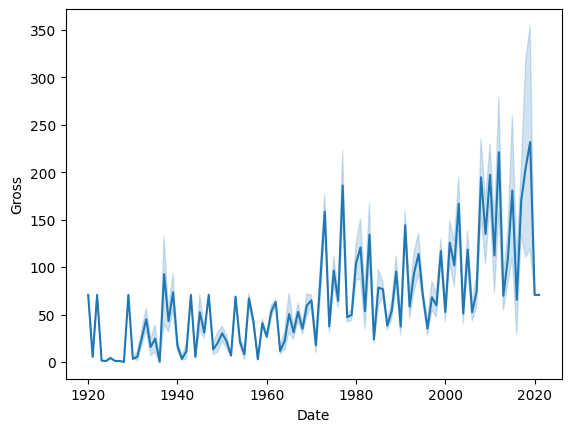

In [12]:
sns.lineplot(x="Date", y= "Gross",data=data);

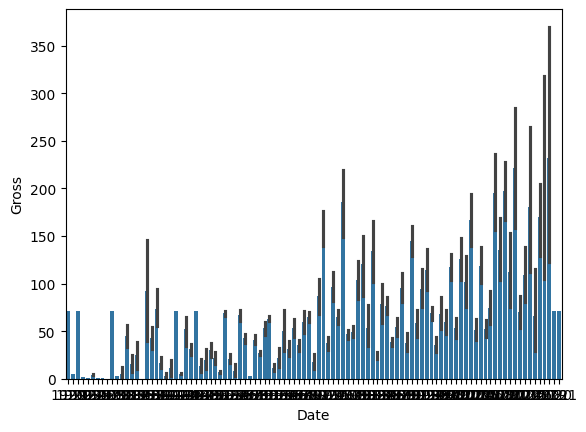

In [13]:
sns.barplot(x="Date", y="Gross",data=data);

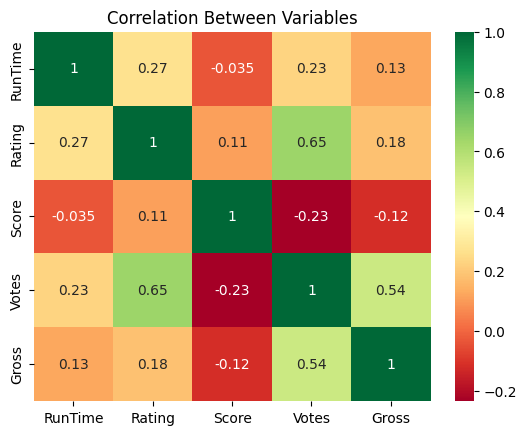

In [14]:
df = data[['RunTime','Rating','Score','Votes','Gross']]
corr_matrix = df.corr()

# Create a heat map for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Between Variables')

plt.show()

In [15]:
X = data[['RunTime', 'Gross', 'Score', 'Votes']]
y = data['Rating']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Veri setini eğitim ve test verisi olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## DECISION TREE REGRESSOR

In [18]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_pred_DTR= model_DTR.predict(X_test)

In [19]:
mse_DTR = mean_squared_error(y_test, y_pred_DTR)
print("DTR Mean Squared Error (MSE): ",mse_DTR)

DTR Mean Squared Error (MSE):  0.01097435897435898


In [20]:
r_squared_DTR= model_DTR.score(X_test,y_test)
print('DTR R-squared: %.4f' % r_squared_DTR)

DTR R-squared: 0.9014


In [21]:
predictions = pd.DataFrame({'DTR Real Value': y_test, 'DTR Predict': y_pred_DTR})
print(predictions)

      DTR Real Value  DTR Predict
3106             8.2          8.2
6161             8.1          8.1
1867             7.9          7.9
3238             8.1          7.3
5509             8.8          8.8
...              ...          ...
4574             8.3          8.3
4767             8.7          8.7
2387             8.1          8.1
657              8.4          8.4
790              8.3          8.3

[1950 rows x 2 columns]


In [22]:
def calculate_mape(y_test, y_pred_DTR):
    return np.mean(np.abs((y_test - y_pred_DTR) / y_test)) * 100

mape_DTR = calculate_mape(y_test, y_pred_DTR)
print("DTR Mean Absolute Percentage Error (MAPE): ",mape_DTR)

DTR Mean Absolute Percentage Error (MAPE):  0.23528766855414004


In [23]:
rmse_DTR = np.sqrt(mean_squared_error(y_test, y_pred_DTR))
print("DTR Root Mean Square Error (RMSE):  ",rmse_DTR)

DTR Root Mean Square Error (RMSE):   0.1047585747056487


In [24]:
mae_DTR = mean_absolute_error(y_test, y_pred_DTR)
print("DTR Mean Absolute Error (MAE): ",mae_DTR)

DTR Mean Absolute Error (MAE):  0.01753846153846296


In [25]:
r2 =model_DTR.score(X_test,y_test)
d_r2_DTR = 1-(1-r2)*((5125-1)/(5125-1-5))
print("DTR Adjusted R-squared: ",d_r2_DTR)

DTR Adjusted R-squared:  0.9013387548538567


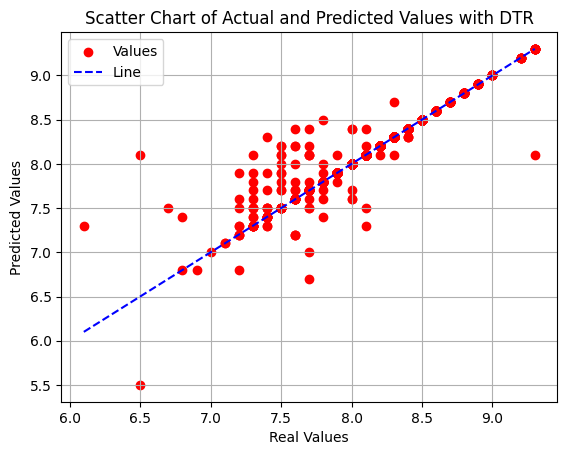

In [26]:
plt.scatter(y_test,y_pred_DTR, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with DTR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

## GRADIENT BOOSTING REGRESSOR ( GBR )

In [27]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)
y_pred_GBR = model_GBR.predict(X_test)


In [28]:
mse_GBR = mean_squared_error(y_test, y_pred_GBR)
print("GBR Mean Squared Error (MSE): ",mse_GBR)

GBR Mean Squared Error (MSE):  0.024879782656821975


In [29]:
r_squared_GBR= model_GBR.score(X_test,y_test)

print('GBR R-squared: %.4f' % r_squared_GBR)

GBR R-squared: 0.7765


In [30]:
predictions = pd.DataFrame({'GBR Real Value': y_test, 'GBR Predict ': y_pred_GBR})
print(predictions)

      GBR Real Value  GBR Predict 
3106             8.2      8.170628
6161             8.1      8.145288
1867             7.9      7.957571
3238             8.1      7.825530
5509             8.8      8.775438
...              ...           ...
4574             8.3      8.421195
4767             8.7      8.573326
2387             8.1      8.136468
657              8.4      8.014788
790              8.3      8.275151

[1950 rows x 2 columns]


In [31]:
def calculate_mape(y_test, y_pred_GBR):
    return np.mean(np.abs((y_test - y_pred_GBR) / y_test)) * 100

mape_GBR = calculate_mape(y_test, y_pred_GBR)
print("GBR Mean Absolute Percentage Error (MAPE): ",mape_GBR)

GBR Mean Absolute Percentage Error (MAPE):  1.349705460838924


In [32]:
rmse_GBR = np.sqrt(mean_squared_error(y_test, y_pred_GBR))
print("GBR Root Mean Square Error (RMSE):  ",rmse_GBR)

GBR Root Mean Square Error (RMSE):   0.1577332642685809


In [33]:
mae_GBR = mean_absolute_error(y_test, y_pred_GBR)
print("GBR Mean Absolute Error (MAE): ",mae_GBR)

GBR Mean Absolute Error (MAE):  0.10835028425803414


In [34]:
r2 =model_GBR.score(X_test,y_test)
d_r2_GBR = 1-(1-r2)*((5125-1)/(5125-1-5))
print("GBR Adjusted R-squared: ",d_r2_GBR)

GBR Adjusted R-squared:  0.7763267684588513


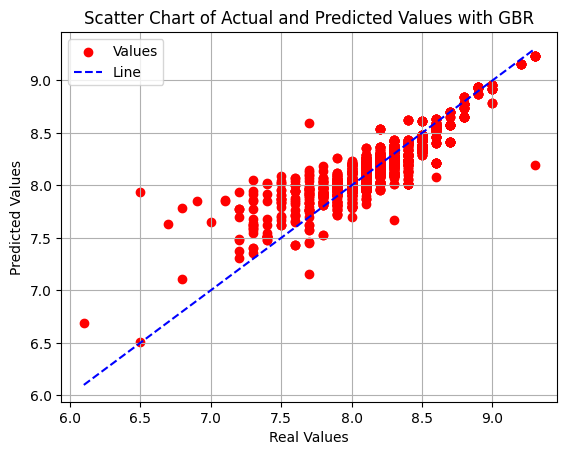

In [35]:
plt.scatter(y_test,y_pred_GBR, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with GBR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

## XGBOOST 


In [36]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

In [37]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGB Mean Squared Error (MSE): ", mse_xgb)

XGB Mean Squared Error (MSE):  0.008944473524695606


In [38]:
r_squared_xgb =model_xgb.score(X_test,y_test)
print('XGB R-squared: %.4f' % r_squared_xgb)

XGB R-squared: 0.9197


In [39]:
predictions = pd.DataFrame({'XGB Real Value ':y_test, 'XGB Predict':y_pred_xgb})
print(predictions)

      XGB Real Value   XGB Predict
3106              8.2     8.195680
6161              8.1     8.102114
1867              7.9     7.904491
3238              8.1     7.636835
5509              8.8     8.800789
...               ...          ...
4574              8.3     8.308025
4767              8.7     8.698166
2387              8.1     8.102206
657               8.4     8.372273
790               8.3     8.301666

[1950 rows x 2 columns]


In [40]:
def calculate_mape(y_test, y_pred_xgb):
    return np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

mape_xgb = calculate_mape(y_test, y_pred_xgb)
print("XGB Mean Absolute Percentage Error (MAPE): ",mape_xgb)

XGB Mean Absolute Percentage Error (MAPE):  0.3028327798900574


In [41]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGB Root Mean Square Error (RMSE):  ",rmse_xgb)


XGB Root Mean Square Error (RMSE):   0.09457522680224249


In [42]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGB Mean Absolute Error (MAE): ",mae_xgb)

XGB Mean Absolute Error (MAE):  0.023098818803444894


In [43]:
r2 =model_xgb.score(X_test,y_test)
d_r2_xgb = 1-(1-r2)*((5125-1)/(5125-1-5))
print("XGB Adjusted R-squared: ",d_r2_xgb)

XGB Adjusted R-squared:  0.9195877502107381


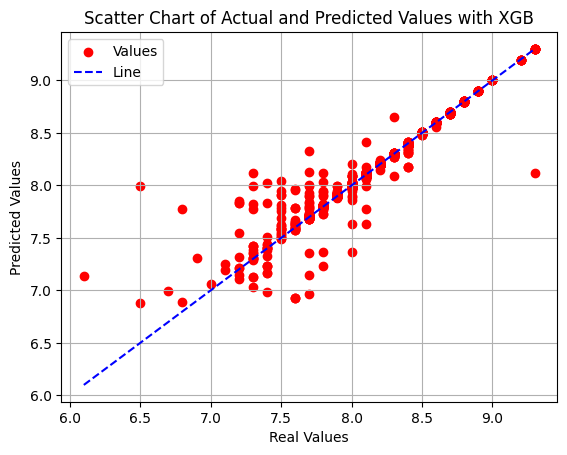

In [44]:
plt.scatter(y_test,y_pred_xgb, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with XGB')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

## RANDOM FOREST REGRESSOR ( RFR )

In [45]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train,y_train)
y_pred_RFR = model_RFR.predict(X_test)

In [46]:
mse_RFR = mean_squared_error(y_test,y_pred_RFR)
print("RFR Mean Squared Error (MSE): ",mse_RFR)

RFR Mean Squared Error (MSE):  0.00801676256410259


In [47]:
r_squared_RFR= model_RFR.score(X_test,y_test)
print('RFR R-squared: %.4f' % r_squared_RFR)

RFR R-squared: 0.9280


In [48]:
predictions = pd.DataFrame({'RFR Real Value ':y_test, 'RFR Predict':y_pred_RFR})
print(predictions)

      RFR Real Value   RFR Predict
3106              8.2        8.200
6161              8.1        8.100
1867              7.9        7.900
3238              8.1        7.525
5509              8.8        8.800
...               ...          ...
4574              8.3        8.300
4767              8.7        8.700
2387              8.1        8.100
657               8.4        8.400
790               8.3        8.300

[1950 rows x 2 columns]


In [49]:
rmse_RFR = np.sqrt(mean_squared_error(y_test, y_pred_RFR))
print("RFR Root Mean Square Error (RMSE):  ",rmse_RFR)

RFR Root Mean Square Error (RMSE):   0.08953637564756901


In [50]:
def calculate_mape(y_test, y_pred_RFR):
    return np.mean(np.abs((y_test-y_pred_RFR) / y_test))*100

mape_RFR = calculate_mape(y_test,y_pred_RFR)
print("RFR Mean Absolute Percentage Error (MAPE): ",mape_RFR)

RFR Mean Absolute Percentage Error (MAPE):  0.2523872310398649


In [51]:
mae_RFR = mean_absolute_error(y_test,y_pred_RFR)
print("RFR Mean Absolute Error (MAE): ",mae_RFR)

RFR Mean Absolute Error (MAE):  0.01893794871795758


In [52]:
r2 = model_RFR.score(X_test,y_test)
d_r2_RFR = 1 - (1 - r2)*((5125-1)/(5125-1-5))
print("RFR Adjusted R-squared: ",d_r2_RFR)

RFR Adjusted R-squared:  0.9279280203551434


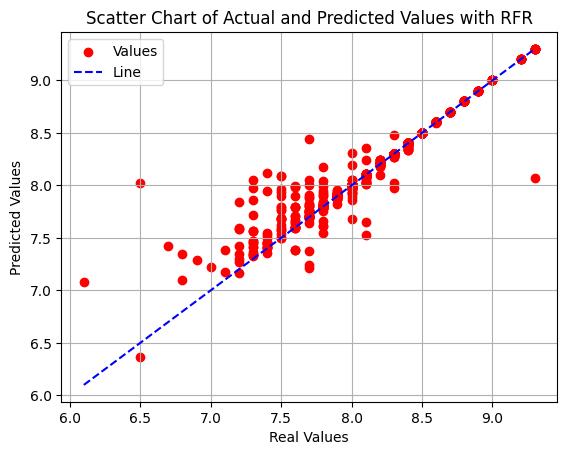

In [53]:
plt.scatter(y_test,y_pred_RFR, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with RFR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

## SUPPORT VECTOR REGRESSION ( SVR)

In [54]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)
y_pred_SVR = model_SVR.predict(X_test)

In [55]:
mse_SVR = mean_squared_error(y_test,y_pred_SVR)
print("SVR Mean Squared Error (MSE): ",mse_SVR)

SVR Mean Squared Error (MSE):  0.060432883708995765


In [56]:
r_squared_SVR =model_SVR.score(X_test,y_test)
print('SVR R-squared: %.4f' % r_squared_SVR)

SVR R-squared: 0.4572


In [57]:
predictions = pd.DataFrame({'SVR Real Value ':y_test, 'SVR Predict':y_pred_SVR})
print(predictions)

      SVR Real Value   SVR Predict
3106              8.2     8.198949
6161              8.1     8.197734
1867              7.9     7.976092
3238              8.1     7.897826
5509              8.8     8.848769
...               ...          ...
4574              8.3     8.220221
4767              8.7     8.408111
2387              8.1     8.166192
657               8.4     8.049190
790               8.3     8.155115

[1950 rows x 2 columns]


In [58]:
rmse_SVR = np.sqrt(mean_squared_error(y_test, y_pred_SVR))
print("SVR Root Mean Square Error (RMSE):  ",rmse_SVR)

SVR Root Mean Square Error (RMSE):   0.24583100640276395


In [59]:
def calculate_mape(y_test, y_pred_SVR):
    return np.mean(np.abs((y_test-y_pred_SVR) / y_test))*100

mape_SVR = calculate_mape(y_test,y_pred_SVR)
print("SVR Mean Absolute Percentage Error (MAPE): ",mape_SVR)

SVR Mean Absolute Percentage Error (MAPE):  2.1785584574323282


In [60]:
mae_SVR = mean_absolute_error(y_test,y_pred_SVR)
print("SVR Mean Absolute Error (MAE): ",mae_SVR)

SVR Mean Absolute Error (MAE):  0.17512361373854837


In [61]:
r2 = model_SVR.score(X_test,y_test)
d_r2_SVR = 1 - (1 - r2)*((5125-1)/(5125-1-5))
print("SVR Adjusted R-squared: ",d_r2_SVR)

SVR Adjusted R-squared:  0.45669869480008773


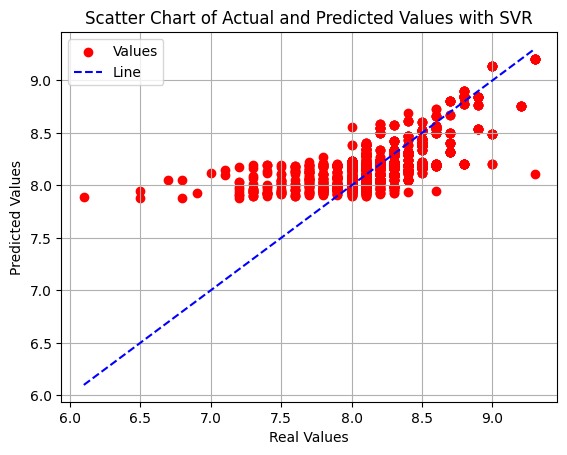

In [62]:
plt.scatter(y_test,y_pred_SVR, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with SVR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

## LINEER REGRESSION (LR)

In [63]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [64]:
mse_LR = mean_squared_error(y_test,y_pred_LR)
print("LR Mean Squared Error (MSE): ",mse_LR)

LR Mean Squared Error (MSE):  0.049903053623084004


In [65]:
r_squared_LR = model_LR.score(X_test,y_test)
print('LR R-squared: %.4f' % r_squared_LR )

LR R-squared: 0.5518


In [66]:
predictions = pd.DataFrame({'LR Real Value ':y_test, 'LR Predict':y_pred_LR})
print(predictions)

      LR Real Value   LR Predict
3106             8.2    8.027619
6161             8.1    8.097686
1867             7.9    8.031946
3238             8.1    7.906249
5509             8.8    8.895363
...              ...         ...
4574             8.3    8.348419
4767             8.7    8.615839
2387             8.1    8.095057
657              8.4    8.007564
790              8.3    8.193900

[1950 rows x 2 columns]


In [67]:
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print("LR Root Mean Square Error (RMSE):  ",rmse_LR)

LR Root Mean Square Error (RMSE):   0.22338991387948562


In [68]:
def calculate_mape(y_test, y_pred_LR):
    return np.mean(np.abs((y_test-y_pred_LR) / y_test))*100

mape_LR = calculate_mape(y_test,y_pred_LR)
print("LR Mean Absolute Percentage Error (MAPE): ",mape_LR)

LR Mean Absolute Percentage Error (MAPE):  2.0231017648641


In [69]:
mae_LR = mean_absolute_error(y_test,y_pred_LR)
print("LR Mean Absolute Error (MAE): ",mae_LR)

LR Mean Absolute Error (MAE):  0.16268469745688993


In [70]:
r2 = model_LR.score(X_test,y_test)
d_r2_LR = 1 - (1 - r2)*((5125-1)/(5125-1-5))
print("LR Adjusted R-squared: ",d_r2_LR)

LR Adjusted R-squared:  0.5513635540306525


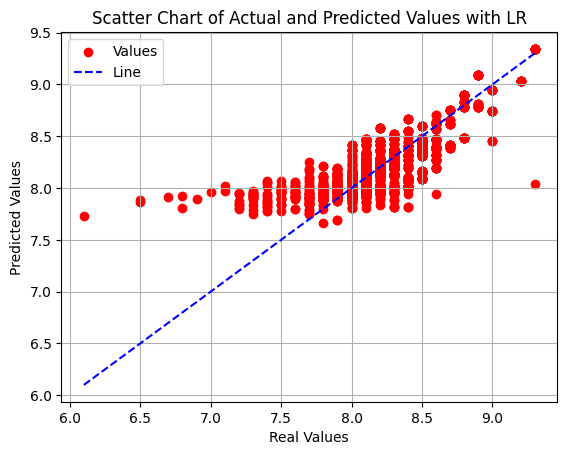

In [71]:
plt.scatter(y_test,y_pred_LR, color='red', marker='o', label='Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Chart of Actual and Predicted Values ​​with LR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label='Line')

plt.legend()
plt.grid()
plt.show()

# Comparison of Models

In [77]:
## Comparison of Models


In [72]:
rmse_list = [rmse_LR,
             rmse_DTR,
             rmse_GBR,
             rmse_RFR,
             rmse_SVR,
             rmse_xgb]
print(rmse_list)

[0.22338991387948562, 0.1047585747056487, 0.1577332642685809, 0.08953637564756901, 0.24583100640276395, 0.09457522680224249]


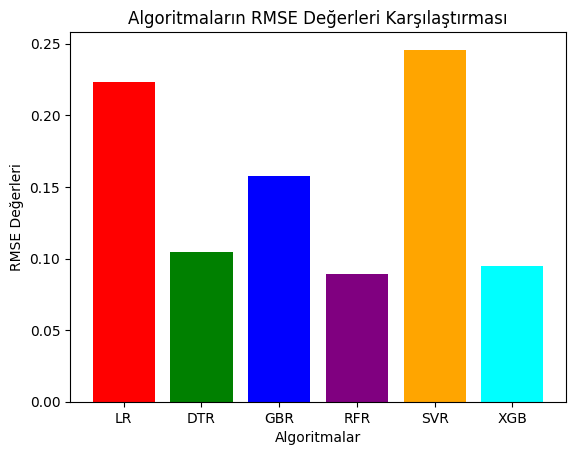

In [73]:


algoritmalar = ['LR', 'DTR', 'GBR', 'RFR', 'SVR', 'XGB']
rmse_list = [rmse_LR, rmse_DTR, rmse_GBR, rmse_RFR, rmse_SVR, rmse_xgb]
renkler = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

plt.bar(algoritmalar, rmse_list, color=renkler)
plt.xlabel('Algoritmalar')
plt.ylabel('RMSE Değerleri')
plt.title('Algoritmaların RMSE Değerleri Karşılaştırması')
plt.show()



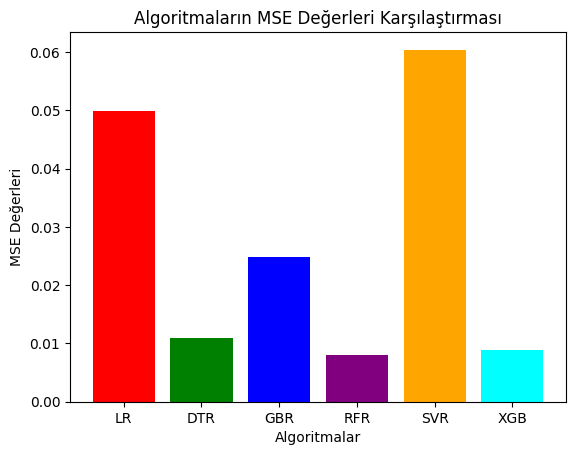

In [74]:
import matplotlib.pyplot as plt

algoritmalar = ['LR', 'DTR', 'GBR', 'RFR', 'SVR', 'XGB']
mse_list = [mse_LR, mse_DTR, mse_GBR, mse_RFR, mse_SVR, mse_xgb]
renkler = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

plt.bar(algoritmalar, mse_list, color=renkler)
plt.xlabel('Algoritmalar')
plt.ylabel('MSE Değerleri')
plt.title('Algoritmaların MSE Değerleri Karşılaştırması')
plt.show()


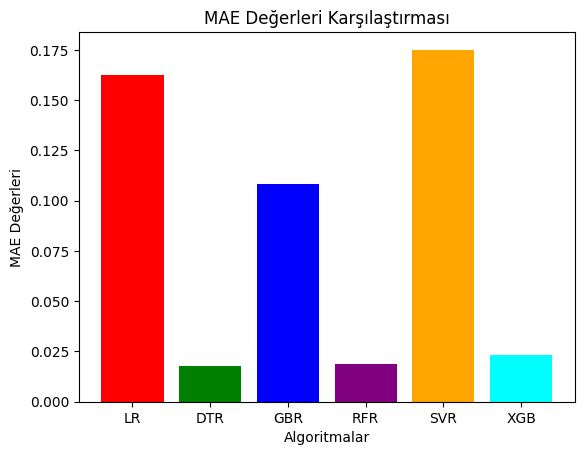

In [75]:
import matplotlib.pyplot as plt

algoritmalar = ['LR', 'DTR', 'GBR', 'RFR', 'SVR', 'XGB']
mae_list = [mae_LR, mae_DTR, mae_GBR, mae_RFR, mae_SVR, mae_xgb]
renkler = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

plt.bar(algoritmalar, mae_list, color=renkler)
plt.xlabel('Algoritmalar')
plt.ylabel('MAE Değerleri')
plt.title('MAE Değerleri Karşılaştırması')
plt.show()


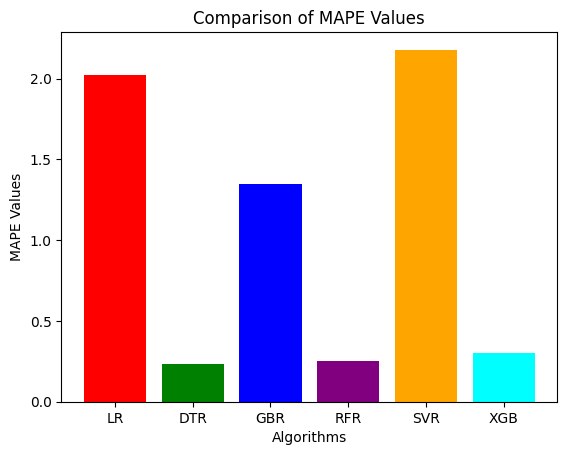

In [76]:
import matplotlib.pyplot as plt

algorithms = ['LR', 'DTR', 'GBR', 'RFR', 'SVR', 'XGB']
mape_values = [mape_LR, mape_DTR, mape_GBR, mape_RFR, mape_SVR, mape_xgb]

colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

plt.bar(algorithms, mape_values, color=colors)
plt.xlabel('Algorithms')
plt.ylabel('MAPE Values')
plt.title('Comparison of MAPE Values')
plt.show()
